In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

In [2]:
all_AVA_muts = pd.read_pickle("../data/4_10_with_uniq_midpts.pkl")
len(all_AVA_muts)

3921

In [3]:
cnt_d = dict()
cnt_d["ALE-unique mutations"] = len(all_AVA_muts)
cnt_d["experiments"] = len(all_AVA_muts.exp.unique())
cnt_d

{'ALE-unique mutations': 3921, 'experiments': 63}

In [4]:
COND_COLS = [
    'temperature',
    'carbon-source',
    'supplement',
    'strain-description',
    'taxonomy-id',
    'base-media',
    'nitrogen-source',
    'phosphorous-source',
    'sulfur-source',
    'calcium-source'
]

exp_ale_conds_df = all_AVA_muts[[
    "exp",
    "ale",
    ] + COND_COLS].copy()
exp_ale_conds_df = exp_ale_conds_df.drop_duplicates()
cnt_d["ALEs"] = len(exp_ale_conds_df)
exp_ale_conds_df = exp_ale_conds_df.rename(columns={"taxonomy-id": "organism"})

for col in COND_COLS:
    exp_ale_conds_df = exp_ale_conds_df.rename(columns={col: col.replace('-', ' ')})

exp_ale_conds_df["organism"] = exp_ale_conds_df.apply(lambda r: "E. coli K-12 MG1655" if r["organism"] == "511145" else r["organism"], axis=1)
exp_ale_conds_df = exp_ale_conds_df.rename(columns={"strain description": "strain"})
exp_ale_conds_df

exp  ale temperature carbon source                   supplement  \
0        42C    1  42 celsius    glucose(4)  NaCl(0.5g/L) trace elements   
5        42C    4  42 celsius    glucose(4)  NaCl(0.5g/L) trace elements   
13       42C    5  42 celsius    glucose(4)  NaCl(0.5g/L) trace elements   
21       42C    7  42 celsius    glucose(4)  NaCl(0.5g/L) trace elements   
29       42C    9  42 celsius    glucose(4)  NaCl(0.5g/L) trace elements   
...      ...  ...         ...           ...                          ...   
3884  tpiVCH   25  37 celsius    glucose(4)  NaCl(0.5g/L) trace elements   
3889  tpiVCH   26  37 celsius    glucose(4)  NaCl(0.5g/L) trace elements   
3897  tpiVCH   27  37 celsius    glucose(4)  NaCl(0.5g/L) trace elements   
3905  tpiVCH   28  37 celsius    glucose(4)  NaCl(0.5g/L) trace elements   
3910      wt    2  37 celsius    glucose(2)             gentamycin(0.03)   

                strain             organism base media nitrogen source  \
0                   WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
5                   WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
13                  WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
21                  WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
29                  WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
...                ...                  ...        ...             ...   
3884  V. cholerae tpiA  E. coli K-12 MG1655         M9        NH4Cl(1)   
3889  V. cholerae tpiA  E. coli K-12 MG1655         M9        NH4Cl(1)   
3897  V. cholerae tpiA  E. coli K-12 MG1655         M9        NH4Cl(1)   
3905  V. cholerae tpiA  E. coli K-12 MG1655         M9        NH4Cl(1)   
3910                WT  E. coli K-12 MG1655         M9        NH4Cl(1)   

          phosphorous source sulfur source calcium source  
0     KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
5     KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
13    KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
21    KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
29    KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
...                      ...           ...            ...  
3884  KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
3889  KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
3897  KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
3905  KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
3910  KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  

[357 rows x 12 columns]

In [5]:
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "trace elements only" if r["supplement"] == "NaCl(0.5g/L) trace elements" else r["supplement"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "FeSO4(20uM), sodium citrate(10mM)" if r["supplement"] == "20uM FeSO4 and 10mM sodium citrate" else r["supplement"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "glycine, L-serine" if r["supplement"] == "glycine(2mM)  L-Serine(varying concentration)  trace elements(X1)  Wolfe's vitamin solution." else r["supplement"], axis=1)

exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "monomethyl succinate(varying)" if r["carbon source"] == "monomethyl succinate" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "m-tartrate(varying)" if r["carbon source"] == "m-tartrate" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "D-lyxose(varying)" if r["carbon source"] == "D-lyxose" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "D-arabinose(varying)" if r["carbon source"] == "D-arabinose" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "D-2-deoxyribose(varying)" if r["carbon source"] == "D-2-deoxyribose" else r["carbon source"], axis=1)

exp_ale_conds_df

exp  ale temperature carbon source           supplement  \
0        42C    1  42 celsius    glucose(4)  trace elements only   
5        42C    4  42 celsius    glucose(4)  trace elements only   
13       42C    5  42 celsius    glucose(4)  trace elements only   
21       42C    7  42 celsius    glucose(4)  trace elements only   
29       42C    9  42 celsius    glucose(4)  trace elements only   
...      ...  ...         ...           ...                  ...   
3884  tpiVCH   25  37 celsius    glucose(4)  trace elements only   
3889  tpiVCH   26  37 celsius    glucose(4)  trace elements only   
3897  tpiVCH   27  37 celsius    glucose(4)  trace elements only   
3905  tpiVCH   28  37 celsius    glucose(4)  trace elements only   
3910      wt    2  37 celsius    glucose(2)     gentamycin(0.03)   

                strain             organism base media nitrogen source  \
0                   WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
5                   WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
13                  WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
21                  WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
29                  WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
...                ...                  ...        ...             ...   
3884  V. cholerae tpiA  E. coli K-12 MG1655         M9        NH4Cl(1)   
3889  V. cholerae tpiA  E. coli K-12 MG1655         M9        NH4Cl(1)   
3897  V. cholerae tpiA  E. coli K-12 MG1655         M9        NH4Cl(1)   
3905  V. cholerae tpiA  E. coli K-12 MG1655         M9        NH4Cl(1)   
3910                WT  E. coli K-12 MG1655         M9        NH4Cl(1)   

          phosphorous source sulfur source calcium source  
0     KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
5     KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
13    KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
21    KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
29    KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
...                      ...           ...            ...  
3884  KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
3889  KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
3897  KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
3905  KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
3910  KH2PO4(3) Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  

[357 rows x 12 columns]

In [6]:
CONDITION_COLS = ['temperature', 'carbon source', 'supplement',
       'strain', 'organism', 'base media', 'nitrogen source',
       'phosphorous source', 'sulfur source', 'calcium source']

cond_cat_cnt_df = pd.DataFrame()
for cond_cat in CONDITION_COLS:
    for cond, cond_cat_sample_df in exp_ale_conds_df.groupby([cond_cat]):
        d = {"condition type": cond_cat, "condition": cond, "ALE count": len(cond_cat_sample_df)}
        cond_cat_cnt_df = cond_cat_cnt_df.append(d, ignore_index=True)
# cond_cat_cnt_df

In [7]:
cnt_d["condition types"] = len(cond_cat_cnt_df["condition type"].unique())
# so that if multiple conditions have the same entry, like "LB", they be counted separately.
cond_cat_cnt_df["condition"] = cond_cat_cnt_df.apply(lambda r: r["condition"] + " " + r["condition type"], axis=1)
cnt_d["unique conditions"] = len(cond_cat_cnt_df["condition"].unique())
cnt_d

{'ALE-unique mutations': 3921,
 'experiments': 63,
 'ALEs': 357,
 'condition types': 10,
 'unique conditions': 93}

In [8]:
obs_and_unique_feat_cnt_df = pd.read_pickle("../data/obs_and_unique_feat_cnt_df.pkl")
print(obs_and_unique_feat_cnt_df["feature type"].unique())
cnt_d["feature types"] = len(obs_and_unique_feat_cnt_df["feature type"].unique())
cnt_d

['gene' 'operons' 'promoter' 'TFBS' 'regulators' 'pathways' 'intergenic'
 'attenuator terminator' 'terminator' 'RBS']


{'ALE-unique mutations': 3921,
 'experiments': 63,
 'ALEs': 357,
 'condition types': 10,
 'unique conditions': 93,
 'feature types': 10}

In [9]:
cnt_d["samples"] = 1017  # This is calculated in 1_aledb_mutation_df.ipynb from the AVA pipeline before samples are flattened into ALEs by the "ALE-unique mutations" logic.

In [10]:
# This is calculated in 1_aledb_mutation_df.ipynb from the AVA pipeline before samples are flattened into ALEs by the "ALE-unique mutations" logic.
# This mutation set excludes manually filtered starting strain mutations, and includes mutations with all frequencies and hypermutators.
cnt_d["observed mutations"] = 13956

In [11]:
LEGEND_BARPLOT_WIDTH = 1.5

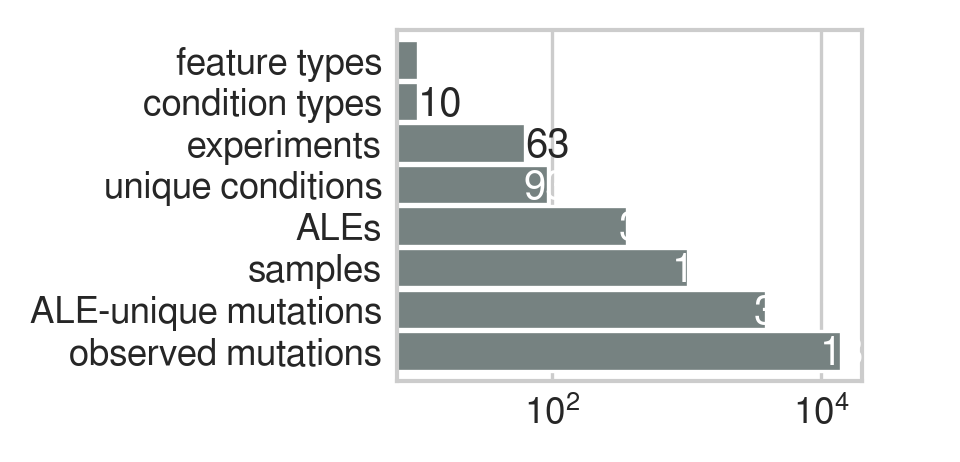

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

d = cnt_d.copy()
cnt_df = pd.DataFrame.from_dict(d, orient='index', columns=["count"])
cnt_df = cnt_df.sort_values(by="count", ascending=False)

ax = cnt_df.plot.barh(
    color="#768281",
    figsize=(2,1.55),
    width=0.95
)

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(False)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='both', which='both', length=0)


cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["count"]))
    # Below is a hack to get the barplot labels inside bars when appropriate
    if i in (5,6):
        ax.text(r["count"], i-0.34,  s, fontname="FreeSans")
    elif i == 4:
        ax.text(r["count"]-32, i-0.34,  s, fontname="FreeSans", color="white")
    elif i == 3:
        ax.text(r["count"]-47, i-0.34,  s, fontname="FreeSans", color="white")
    elif i == 2:
        ax.text(r["count"]-240, i-0.34,  s, fontname="FreeSans", color="white")
    elif i == 1:
        ax.text(r["count"]-760, i-0.34,  s, fontname="FreeSans", color="white")
    elif i == 0:
        ax.text(r["count"]-4200, i-0.34,  s, fontname="FreeSans", color="white")

        
        
plt.savefig("../figs/gdmuts_AVA_mags.svg", format="svg")

In [13]:
# This image is for presentations and not currently for the manuscript
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
d = cnt_d.copy()
cnt_df = pd.DataFrame.from_dict(d, orient='index', columns=["count"])
cnt_df = cnt_df.sort_values(by="count", ascending=False)
cnt_df = cnt_df.rename(index={
    "samples": "sequenced samples",
    "ALEs": "independent ALE replicates",
    "ALE-unique mutations": "ALE-replicate unique mutations",
})


fig = go.Figure()
x = list(cnt_df.index)
y = list(cnt_df["count"])

fig = go.Figure(data=[go.Bar(
    x=y, y=x,
    orientation='h',
    text=y,
    textposition='auto',
#     xaxis= {'dtick': 1},
    marker=dict(
        color='#768281',
    )
)])

fig.update_xaxes(type="log")
fig.update_layout(
    xaxis = {'dtick': 1},  # Removes the additional ticks between orders of magnitude
    title={
        #         'text': "Public ALEdb<br><i>E. coli</i> K-12 MG1655<br>dimensions",
        'y': 0.975,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    template="plotly_white",
    autosize=False,
    width=650,
    height=450,
    font=dict(
        family="Helvetica",
        color="black",
        size=18,
    )
)
fig.write_image("../figs/gdmuts_f2a.svg", engine="kaleido")
fig.show()

In [14]:
# exp_ale_conds_df["condition"] = exp_ale_conds_df.apply(lambda r: "trace elements only" if r["condition"]=="NaCl(0.5g/L) trace elements" else r["condition"], axis=1)
exp_ale_conds_df["phosphorous source"] = exp_ale_conds_df.apply(lambda r: "KH2PO4(3), Na2HPO4(6.8)" if r["phosphorous source"] == "KH2PO4(3) Na2HPO4(6.8)" else r["phosphorous source"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "trace elements only" if r["supplement"] == "NaCl(0.5g/L) trace elements" else r["supplement"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "glycine, L-serine" if r["supplement"] == "glycine(2mM)  L-Serine(varying concentration)  trace elements(X1)  Wolfe's vitamin solution." else r["supplement"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "trace elements only" if r["supplement"] == "20uM FeSO4 and 10mM sodium citrate" else r["supplement"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "FeSO4, sodium citrate" if r["supplement"] == "FeSO4(20uM), sodium citrate(10mM)" else r["supplement"], axis=1)

exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "monomethyl succinate(varying)" if r["carbon source"] == "monomethyl succinate" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "m-tartrate(varying)" if r["carbon source"] == "m-tartrate" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "D-lyxose(varying)" if r["carbon source"] == "D-lyxose" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "D-arabinose(varying)" if r["carbon source"] == "D-arabinose" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "D-2-deoxyribose(varying)" if r["carbon source"] == "D-2-deoxyribose" else r["carbon source"], axis=1)

exp_ale_conds_df["calcium source"] = exp_ale_conds_df.apply(lambda r: "CaCl2(0.1)" if r["calcium source"] == "CaCl2(0.1mM)" else r["calcium source"], axis=1)

# # To use for strain description changes (example: BOP1000)
exp_ale_conds_df["strain"] = exp_ale_conds_df.apply(lambda r: "glucose M9 evolved" if r["strain"] == "GMOS" else r["strain"], axis=1)
exp_ale_conds_df["strain"] = exp_ale_conds_df.apply(lambda r: "glucose M9 evolved" if r["strain"] == "glucose M9 pre-evolved" else r["strain"], axis=1)
exp_ale_conds_df["strain"] = exp_ale_conds_df.apply(lambda r: "glucose M9 evolved" if r["strain"] == "glucose-evolved BOP1000" else r["strain"], axis=1)
exp_ale_conds_df["strain"] = exp_ale_conds_df.apply(lambda r: "Δpgi glucose M9 evolved" if r["strain"] == "Δpgi glucose M9 pre-evolved" else r["strain"], axis=1)
exp_ale_conds_df["strain"] = exp_ale_conds_df.apply(lambda r: "Δgnd glucose M9 evolved" if r["strain"] == "Δgnd glucose M9 pre-evolved" else r["strain"], axis=1)
exp_ale_conds_df["strain"] = exp_ale_conds_df.apply(lambda r: "ΔsdhCDAB glucose M9 evolved" if r["strain"] == "ΔsdhCDAB glucose M9 pre-evolved" else r["strain"], axis=1)
exp_ale_conds_df["strain"] = exp_ale_conds_df.apply(lambda r: "ΔptsHI-crr glucose M9 evolved" if r["strain"] == "ΔptsHI-crr glucose M9 pre-evolved" else r["strain"], axis=1)
exp_ale_conds_df["strain"] = exp_ale_conds_df.apply(lambda r: "ΔtpiA glucose M9 evolved" if r["strain"] == "ΔtpiA glucose M9 pre-evolved" else r["strain"], axis=1)

exp_ale_conds_df["phosphorous source"] = exp_ale_conds_df.apply(lambda r: "KH2PO4(3), Na2HPO4(6.8)" if r["phosphorous source"] == "KH2PO4(3) Na2HPO4(6.78)" else r["phosphorous source"], axis=1)

exp_ale_conds_df

exp  ale temperature carbon source           supplement  \
0        42C    1  42 celsius    glucose(4)  trace elements only   
5        42C    4  42 celsius    glucose(4)  trace elements only   
13       42C    5  42 celsius    glucose(4)  trace elements only   
21       42C    7  42 celsius    glucose(4)  trace elements only   
29       42C    9  42 celsius    glucose(4)  trace elements only   
...      ...  ...         ...           ...                  ...   
3884  tpiVCH   25  37 celsius    glucose(4)  trace elements only   
3889  tpiVCH   26  37 celsius    glucose(4)  trace elements only   
3897  tpiVCH   27  37 celsius    glucose(4)  trace elements only   
3905  tpiVCH   28  37 celsius    glucose(4)  trace elements only   
3910      wt    2  37 celsius    glucose(2)     gentamycin(0.03)   

                strain             organism base media nitrogen source  \
0                   WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
5                   WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
13                  WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
21                  WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
29                  WT  E. coli K-12 MG1655         M9        NH4Cl(1)   
...                ...                  ...        ...             ...   
3884  V. cholerae tpiA  E. coli K-12 MG1655         M9        NH4Cl(1)   
3889  V. cholerae tpiA  E. coli K-12 MG1655         M9        NH4Cl(1)   
3897  V. cholerae tpiA  E. coli K-12 MG1655         M9        NH4Cl(1)   
3905  V. cholerae tpiA  E. coli K-12 MG1655         M9        NH4Cl(1)   
3910                WT  E. coli K-12 MG1655         M9        NH4Cl(1)   

           phosphorous source sulfur source calcium source  
0     KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
5     KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
13    KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
21    KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
29    KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
...                       ...           ...            ...  
3884  KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
3889  KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
3897  KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
3905  KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  
3910  KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)     CaCl2(0.1)  

[357 rows x 12 columns]

In [15]:
CONDITION_COLS = ['temperature', 'carbon source', 'supplement',
       'strain', 'organism', 'base media', 'nitrogen source',
       'phosphorous source', 'sulfur source', 'calcium source']

cond_cat_cnt_df = pd.DataFrame()
for cond_cat in CONDITION_COLS:
    for cond, cond_cat_sample_df in exp_ale_conds_df.groupby([cond_cat]):
        d = {"condition category": cond_cat, "condition": cond, "ALE count": len(cond_cat_sample_df)}
        cond_cat_cnt_df = cond_cat_cnt_df.append(d, ignore_index=True)

In [16]:
# matplotlib colormap reference: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

seaborn_palette = "muted"
pal = sns.palettes.SEABORN_PALETTES[seaborn_palette]

cond_col_color_pal_d = {
    "temperature": ["#E74C3C", "#F1C40D", "#E67E23"],
    "organism": ["#956CB4"],
    "carbon source": "bone_d",
    "supplement": "Blues_d",
    "nitrogen source": "Reds_d",
    "base media": "Purples_d",
    "calcium source": "GnBu_d",
    "phosphorous source": "Greens_d",
    "strain": "PuRd_d",
    "sulfur source": "Oranges_d",
}


cond_cat_cnt_colors_df = pd.DataFrame()
for cond_cat, cond_cat_df in cond_cat_cnt_df.groupby(["condition category"]):
    df = cond_cat_df.copy()
    df = df.sort_values(by="ALE count", ascending=True)
    
    if cond_cat not in ["organism", "temperature"]:
        colors = sns.color_palette(cond_col_color_pal_d[cond_cat], len(df))
        colors.reverse()  # need to reverse to get the hue I want for conditions sizes.
    else:
        colors = cond_col_color_pal_d[cond_cat]

    df["color"] = colors
    cond_cat_cnt_colors_df = cond_cat_cnt_colors_df.append(df, ignore_index=True)
    
cond_cat_cnt_colors_df.reset_index(inplace=True, drop=True)  # just making sure that the index is clean
cond_cat_cnt_colors_df["clustermap order"] = cond_cat_cnt_colors_df.index
cond_cat_cnt_colors_df.head()

ALE count condition condition category  \
0       36.0        LB         base media   
1       39.0       M63         base media   
2      282.0        M9         base media   
3        8.0      none     calcium source   
4       36.0        LB     calcium source   

                                               color  clustermap order  
0  (0.33499423298731257, 0.31497116493656285, 0.4...                 0  
1  (0.47213123157759834, 0.4317672689991029, 0.69...                 1  
2  (0.624241958221197, 0.605203127002435, 0.79049...                 2  
3  (0.22971164936562863, 0.42283737024221457, 0.4...                 3  
4  (0.25989491221325134, 0.6492118415993848, 0.79...                 4

# barplots

In [17]:
LEGEND_BARPLOT_WIDTH = 2  # Must be big enough to see the minor log ticks for all plots.
# LEGNED_BARPLOT_BAR_HEIGHT = 0.1875
LEGNED_BARPLOT_BAR_HEIGHT = 0.17

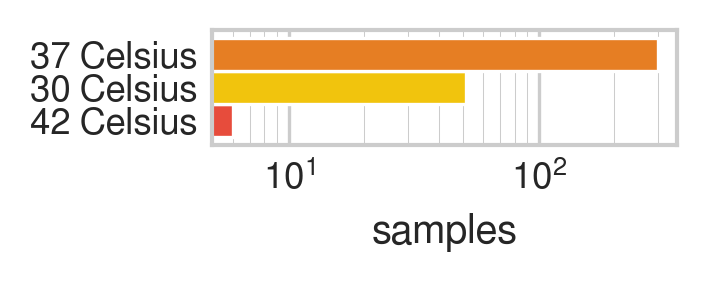

In [18]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


CONDITION = "temperature"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace('celsius', "Celsius"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,LEGNED_BARPLOT_BAR_HEIGHT*len(cnt_df)),
    width=1,
)

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(False)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='both', which='both', length=0)


plt.xlabel('samples')
plt.ylabel('')

plt.xlim(right=cnt_d["ALEs"])
plt.savefig("../figs/f2d_1.svg", format="svg")

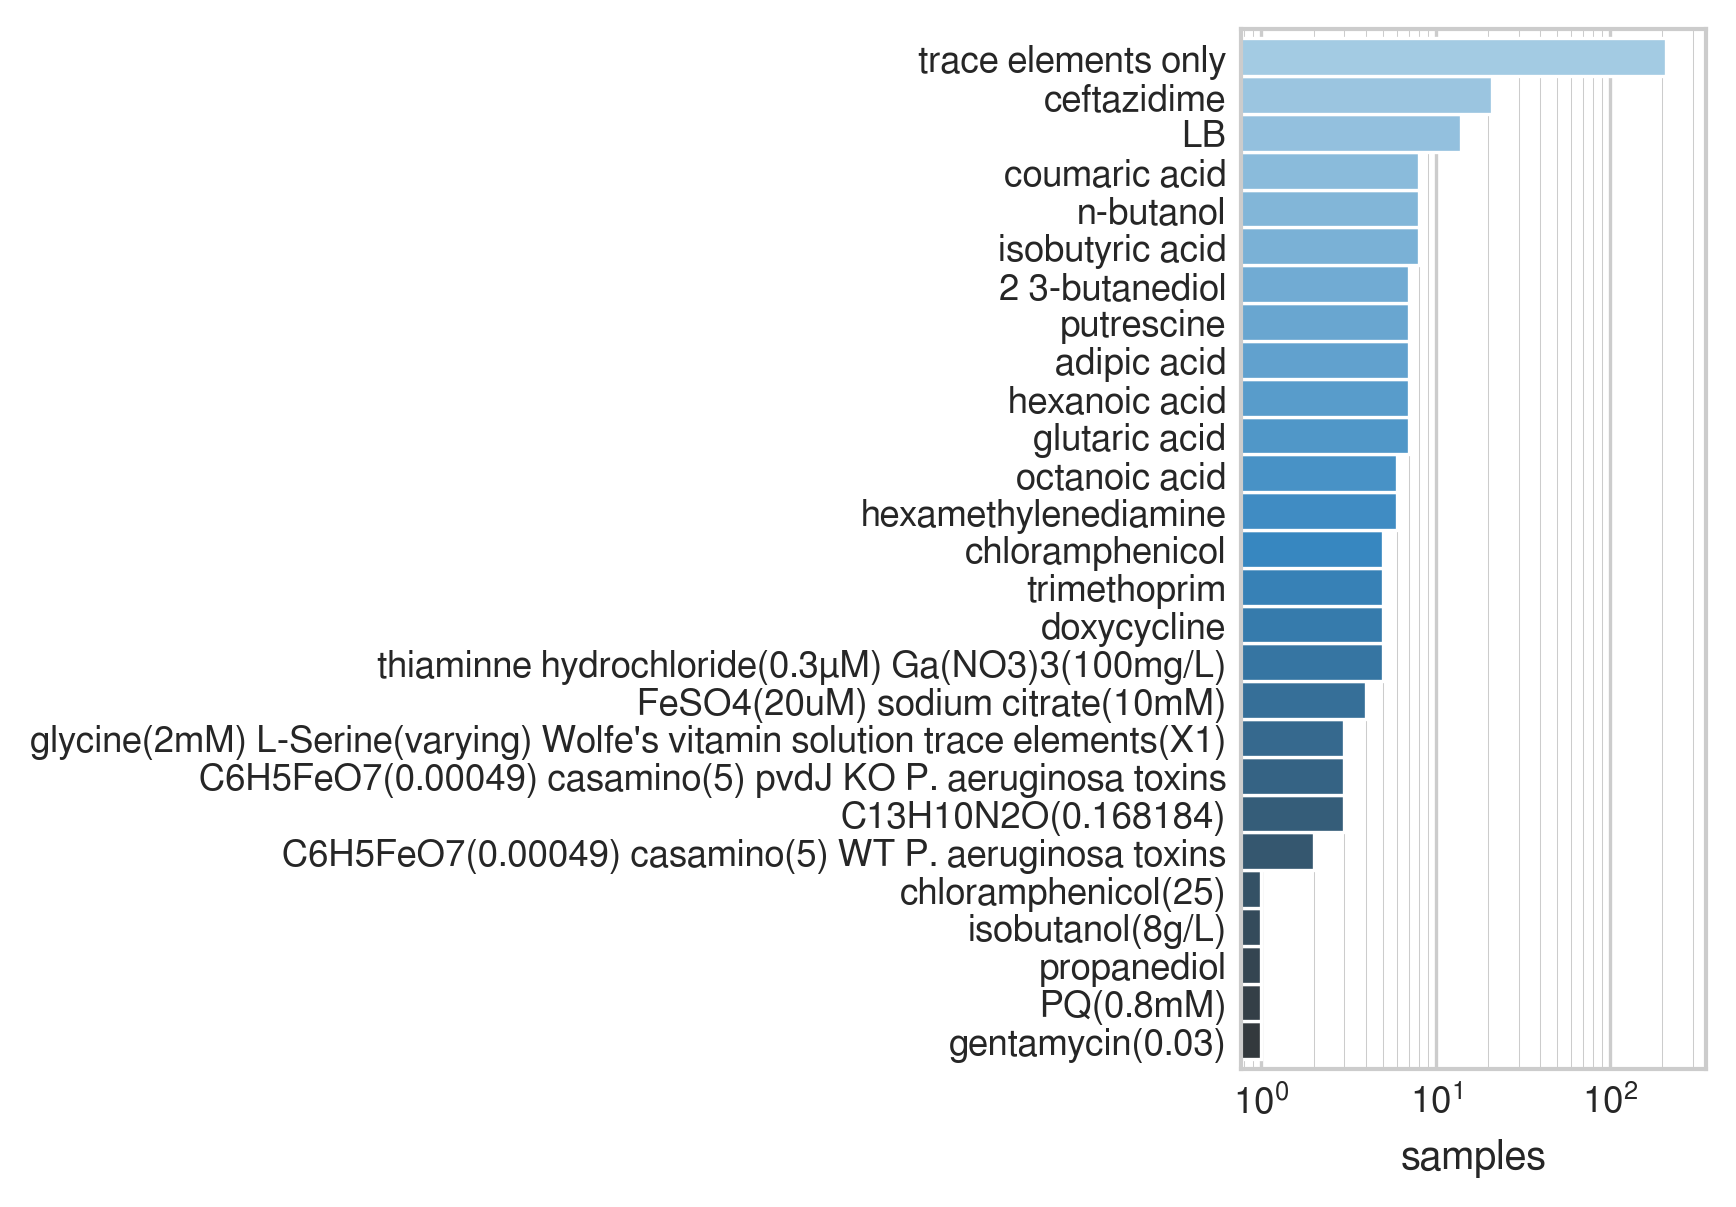

In [19]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


CONDITION = "supplement"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,LEGNED_BARPLOT_BAR_HEIGHT*len(cnt_df)),
    width=1,
)

# for tick in ax.get_xticklabels(): tick.set_fontname("FreeSans")
# for tick in ax.get_yticklabels(): tick.set_fontname("FreeSans")

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(False)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='both', which='both', length=0)

# for tick in ax.get_xticklabels(): tick.set_fontname("FreeSans")
# for tick in ax.get_yticklabels(): tick.set_fontname("FreeSans")

plt.xlabel('samples')
plt.ylabel('')

plt.xlim(right=cnt_d["ALEs"])
plt.savefig("../figs/f2d_2.svg", format="svg")

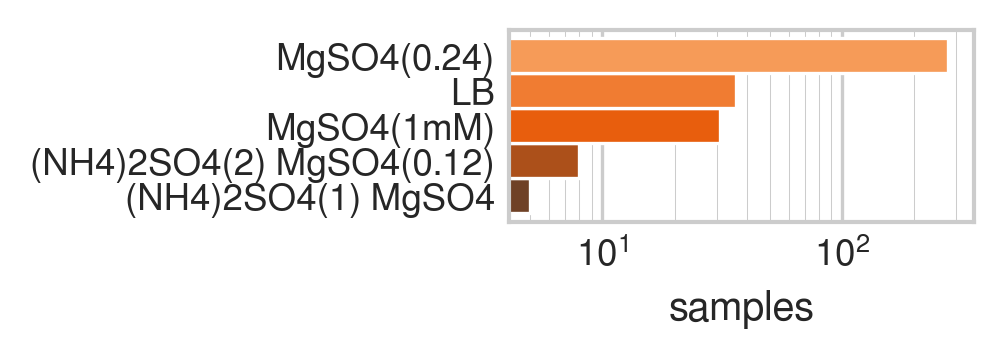

In [20]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("whitegrid")


CONDITION = "sulfur source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,LEGNED_BARPLOT_BAR_HEIGHT*len(cnt_df)),
    width=1,
)

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(False)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='both', which='both', length=0)

for tick in ax.get_xticklabels(): tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels(): tick.set_fontname("FreeSans")
    
plt.xlabel('samples', fontname="FreeSans")
plt.ylabel('', fontname="FreeSans")

plt.xlim(right=cnt_d["ALEs"])
plt.savefig("../figs/f2d_3.svg", format="svg")

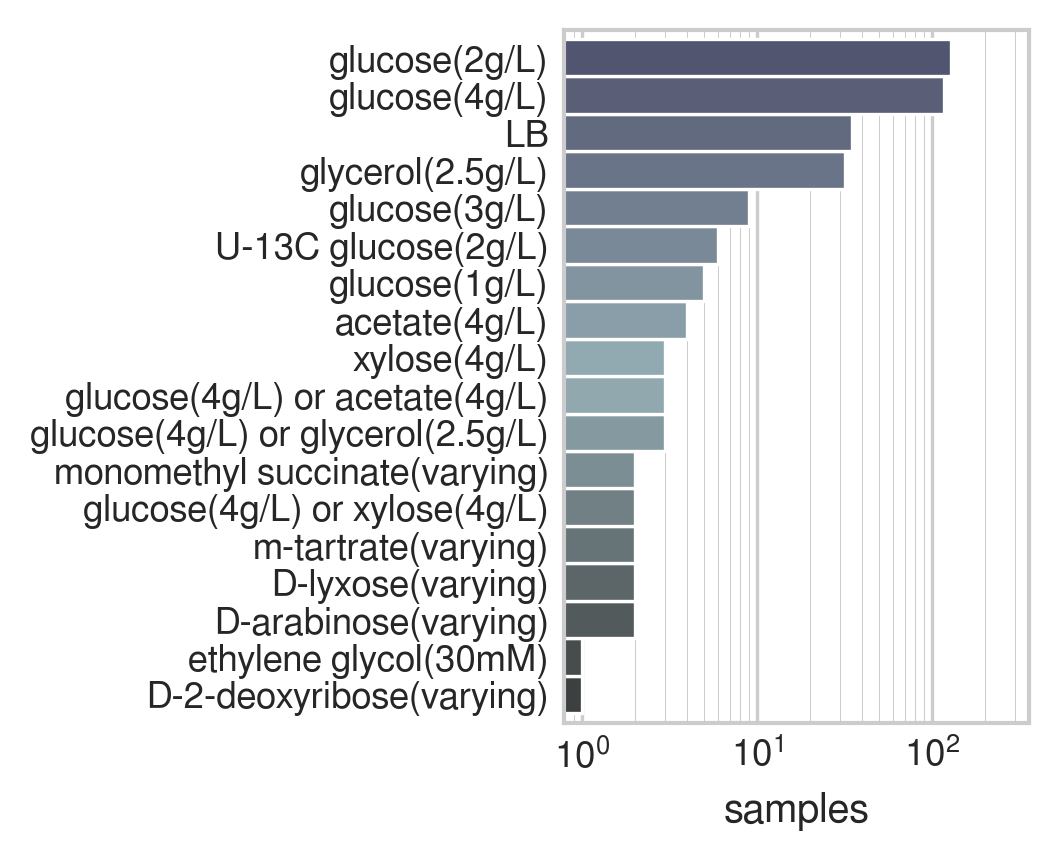

In [21]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("whitegrid")


CONDITION = "carbon source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"] == CONDITION].copy(
)
cnt_df["condition"] = cnt_df.apply(
    lambda r:
    r["condition"].replace(')', "g/L)") if (("varying" not in r["condition"]
                                             ) and ("mM)" not in r["condition"])) else r["condition"],
    axis=1
)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH, LEGNED_BARPLOT_BAR_HEIGHT*len(cnt_df)),
    width=1,
)

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(False)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='both', which='both', length=0)

for tick in ax.get_xticklabels():
    tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels():
    tick.set_fontname("FreeSans")

plt.xlabel('samples', fontname="FreeSans")
plt.ylabel('', fontname="FreeSans")

plt.xlim(right=cnt_d["ALEs"])
plt.savefig("../figs/f2d_4.svg", format="svg")

(32.47918854730803, 357)

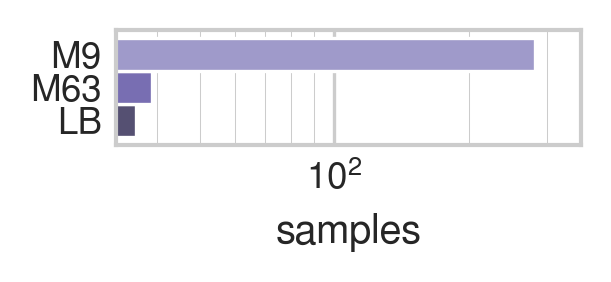

In [22]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("whitegrid")


CONDITION = "base media"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
# cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,LEGNED_BARPLOT_BAR_HEIGHT*len(cnt_df)),
    width=1,
)

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(False)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='both', which='both', length=0)

for tick in ax.get_xticklabels(): tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels(): tick.set_fontname("FreeSans")

plt.xlabel('samples', fontname="FreeSans")
plt.ylabel('', fontname="FreeSans")

plt.xlim(right=cnt_d["ALEs"])

# plt.savefig("./figs/f2d_5.svg", format="svg")

(6.659893272254093, 357)

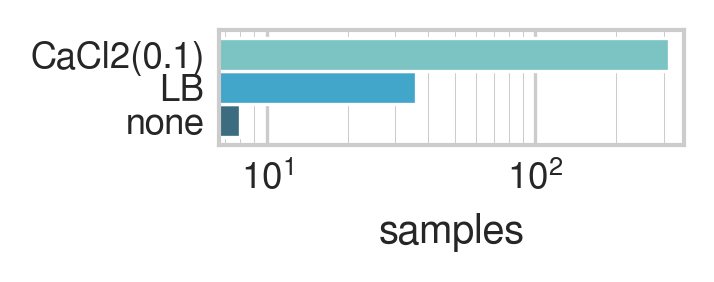

In [23]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("whitegrid")


CONDITION = "calcium source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
# cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,LEGNED_BARPLOT_BAR_HEIGHT*len(cnt_df)),
    width=1,
)

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(False)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='both', which='both', length=0)

for tick in ax.get_xticklabels(): tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels(): tick.set_fontname("FreeSans")

plt.xlabel('samples', fontname="FreeSans")
plt.ylabel('', fontname="FreeSans")


ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_6.svg", format="svg")

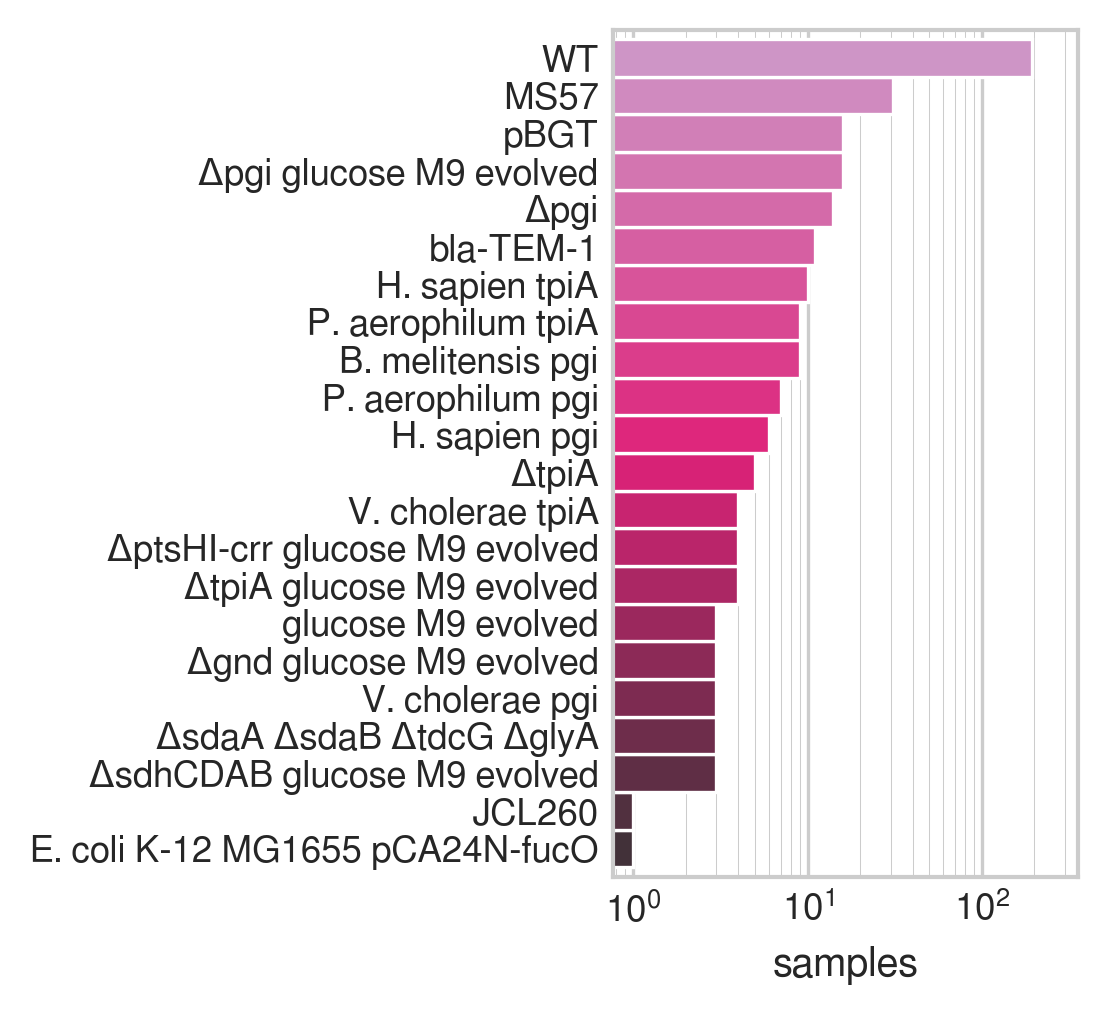

In [24]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


CONDITION = "strain"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
# # cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,LEGNED_BARPLOT_BAR_HEIGHT*len(cnt_df)),
    width=1,
)

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(False)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='both', which='both', length=0)

# for tick in ax.get_xticklabels(): tick.set_fontname("FreeSans")
# for tick in ax.get_yticklabels(): tick.set_fontname("FreeSans")

plt.xlabel('samples')
plt.ylabel('')


plt.xlim(right=cnt_d["ALEs"])
plt.savefig("../figs/f2d_7.svg", format="svg")

(4.069030720608507, 357)

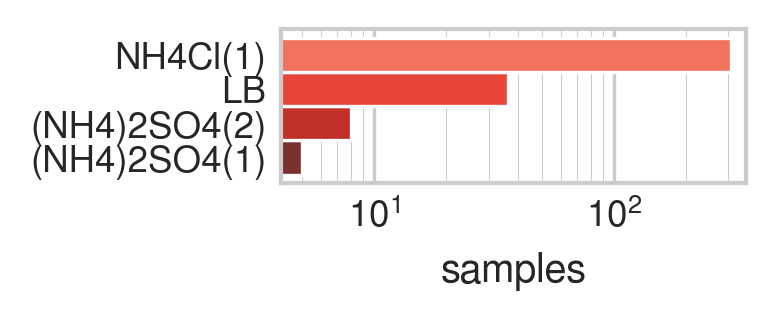

In [25]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("whitegrid")


CONDITION = "nitrogen source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
# # cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,LEGNED_BARPLOT_BAR_HEIGHT*len(cnt_df)),
    width=1,
)

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(False)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='both', which='both', length=0)

for tick in ax.get_xticklabels(): tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels(): tick.set_fontname("FreeSans")

plt.xlabel('samples', fontname="FreeSans")
plt.ylabel('', fontname="FreeSans")

plt.xlim(right=cnt_d["ALEs"])
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_8.svg", format="svg")

(4.069030720608507, 357)

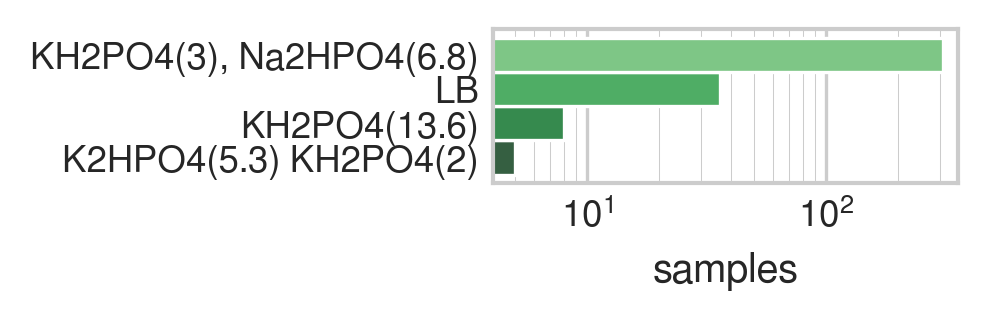

In [26]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("whitegrid")


CONDITION = "phosphorous source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
# # cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)


ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,LEGNED_BARPLOT_BAR_HEIGHT*len(cnt_df)),
    width=1,
)

ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(False)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='both', which='both', length=0)

for tick in ax.get_xticklabels(): tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels(): tick.set_fontname("FreeSans")

plt.xlabel('samples', fontname="FreeSans")
plt.ylabel('', fontname="FreeSans")

plt.xlim(right=cnt_d["ALEs"])
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_10.svg", format="svg")

# clustermap

In [27]:
# Fix for some condition categories sharing a condition name, ex: "LB" or "none"
cccc_df = cond_cat_cnt_colors_df.copy()
cccc_df["condition"] = cccc_df.apply(lambda r: r["condition"] + " " + r["condition category"], axis=1)
cccc_df.head()

ALE count            condition condition category  \
0       36.0        LB base media         base media   
1       39.0       M63 base media         base media   
2      282.0        M9 base media         base media   
3        8.0  none calcium source     calcium source   
4       36.0    LB calcium source     calcium source   

                                               color  clustermap order  
0  (0.33499423298731257, 0.31497116493656285, 0.4...                 0  
1  (0.47213123157759834, 0.4317672689991029, 0.69...                 1  
2  (0.624241958221197, 0.605203127002435, 0.79049...                 2  
3  (0.22971164936562863, 0.42283737024221457, 0.4...                 3  
4  (0.25989491221325134, 0.6492118415993848, 0.79...                 4

In [28]:
cond_to_val_map_d = dict()
for i, r, in cccc_df.iterrows():
    cond_to_val_map_d[r["condition"]] = r["clustermap order"]
# cond_to_val_map_d

In [29]:
# Generate the DF holding the colors
exp_ale_conds_colors_df = exp_ale_conds_df.copy()
exp_ale_conds_colors_df = exp_ale_conds_colors_df.drop(columns=["ale", "exp"])
display(exp_ale_conds_colors_df.head())

# Have to add the condition type since some conditions have the same name across types and therefore mix colors in the clustermap
exp_ale_conds_colors_df = exp_ale_conds_colors_df.astype(str) + pd.DataFrame({col:' '+col for col in exp_ale_conds_colors_df}, index=exp_ale_conds_colors_df.index)

for cond_col in CONDITION_COLS:
    exp_ale_conds_colors_df[cond_col] = exp_ale_conds_colors_df[cond_col].map(cond_to_val_map_d)

exp_ale_conds_colors_df = exp_ale_conds_colors_df.T
exp_ale_conds_colors_df.head()

temperature carbon source           supplement strain             organism  \
0   42 celsius    glucose(4)  trace elements only     WT  E. coli K-12 MG1655   
5   42 celsius    glucose(4)  trace elements only     WT  E. coli K-12 MG1655   
13  42 celsius    glucose(4)  trace elements only     WT  E. coli K-12 MG1655   
21  42 celsius    glucose(4)  trace elements only     WT  E. coli K-12 MG1655   
29  42 celsius    glucose(4)  trace elements only     WT  E. coli K-12 MG1655   

   base media nitrogen source       phosphorous source sulfur source  \
0          M9        NH4Cl(1)  KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)   
5          M9        NH4Cl(1)  KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)   
13         M9        NH4Cl(1)  KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)   
21         M9        NH4Cl(1)  KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)   
29         M9        NH4Cl(1)  KH2PO4(3), Na2HPO4(6.8)   MgSO4(0.24)   

   calcium source  
0      CaCl2(0.1)  
5      CaCl2(0.1)  
13     CaCl2(0.1)  
21     CaCl2(0.1)  
29     CaCl2(0.1)

0     5     13    21    29    35    43    59    61    65    \
temperature      87    87    87    87    87    87    89    89    89    89   
carbon source    22    22    22    22    22    22    18    18    18    18   
supplement       86    86    86    86    86    86    86    86    86    86   
strain           54    54    54    54    54    54    54    54    54    54   
organism         28    28    28    28    28    28    28    28    28    28   

               72    76    89    109   117   122   142   150   166   185   \
temperature      89    89    88    89    89    89    89    89    89    88   
carbon source    18    18     7    22    22    22    22    22    22    20   
supplement       86    86    64    86    86    86    86    86    86    86   
strain           54    54    33    54    54    54    54    54    54    54   
organism         28    28    28    28    28    28    28    28    28    28   

               190   196   218   223   228   230   234   236   239   243   \
temperature      88    88    88    88    88    88    88    88    88    88   
carbon source    20    20    20    20    20    20    20    20    20    20   
supplement       86    86    86    86    86    86    86    86    86    86   
strain           54    54    54    54    54    54    54    54    54    54   
organism         28    28    28    28    28    28    28    28    28    28   

               247   252   263   269   273   277   280   284   286   290   \
temperature      88    88    88    88    88    88    88    88    88    88   
carbon source    20    20    20    20    20    20    20    20    20    20   
supplement       86    86    86    86    86    86    86    86    86    86   
strain           54    54    54    54    54    54    54    54    54    54   
organism         28    28    28    28    28    28    28    28    28    28   

               297   302   304   308   321   323   325   327   330   333   \
temperature      88    88    88    88    88    88    88    88    88    89   
carbon source    20    20    20    20    20    20    20    20    20    23   
supplement       86    86    86    86    86    86    86    86    86    86   
strain           54    54    54    54    54    54    54    54    54    54   
organism         28    28    28    28    28    28    28    28    28    28   

               ...  3502  3512  3522  3527  3532  3541  3546  3555  3563  \
temperature    ...    89    89    89    89    89    89    89    89    89   
carbon source  ...    22    22    22    22    22    22    22    22    19   
supplement     ...    86    86    86    86    86    86    86    86    67   
strain         ...    45    37    37    37    41    41    41    41    54   
organism       ...    28    28    28    28    28    28    28    28    28   

               3568  3575  3583  3590  3601  3609  3615  3621  3624  3638  \
temperature      89    89    89    89    89    89    89    89    89    89   
carbon source    19    19    19    19    19    22    22    22    22    22   
supplement       67    67    66    66    66    86    86    86    86    86   
strain           54    54    54    54    54    35    35    35    40    40   
organism         28    28    28    28    28    28    28    28    28    28   

               3648  3658  3671  3676  3684  3693  3698  3706  3718  3726  \
temperature      89    89    89    89    89    89    89    89    89    89   
carbon source    22    22    22    22    22    22    22    22    22    22   
supplement       86    86    86    86    86    86    86    86    86    86   
strain           40    40    48    48    48    48    48    48    48    48   
organism         28    28    28    28    28    28    28    28    28    28   

               3762  3770  3783  3788  3793  3796  3799  3802  3807  3817  \
temperature      89    89    89    89    89    89    89    89    89    89   
carbon source    22    22    22    22    22    22    22    22    22    22   
supplement       86    86    86    86    86    86    86    86    86    86   
strain   

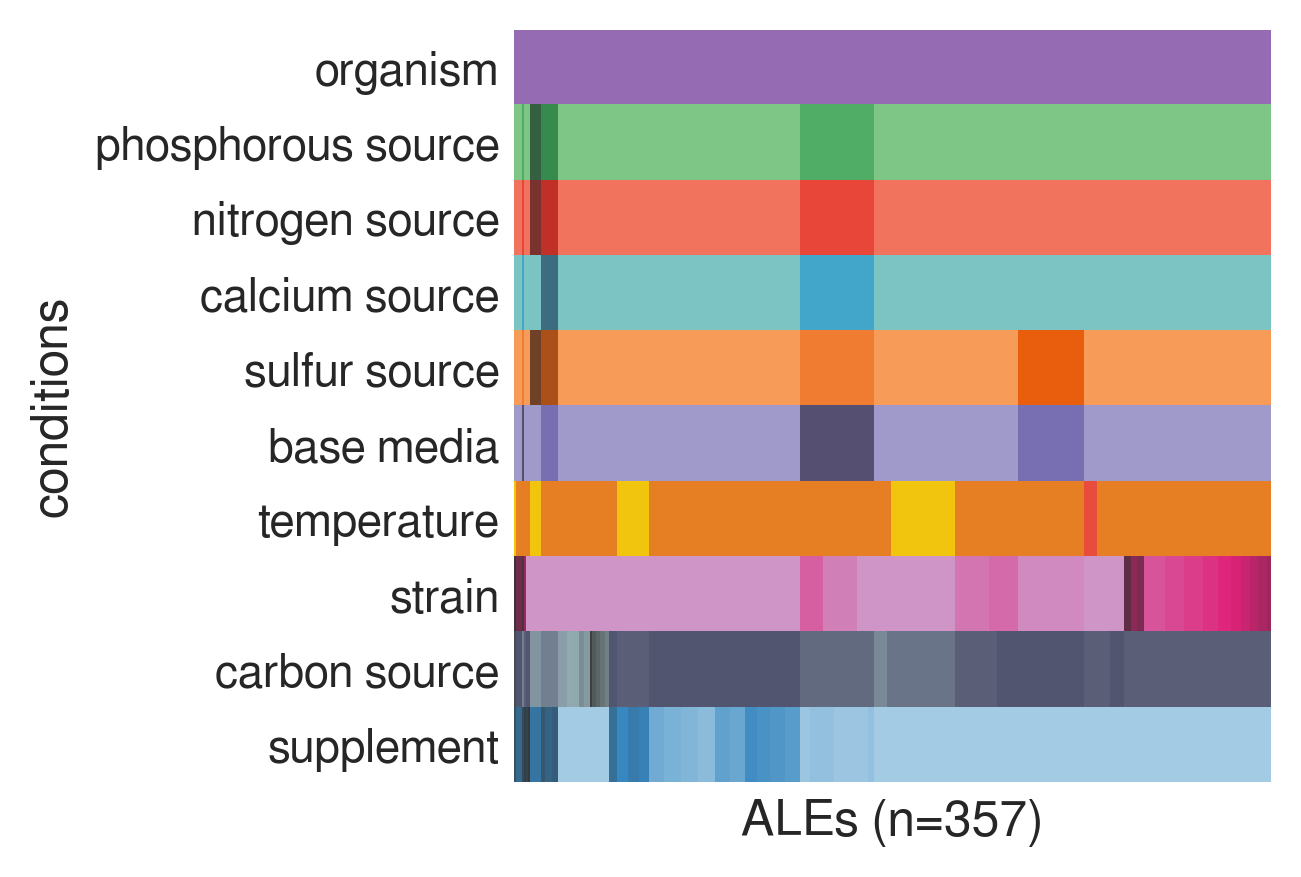

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["FreeSans"]
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
import matplotlib.colors as mcolors
sns.set(font="FreeSans")

df = exp_ale_conds_colors_df.copy()

# explicitely setting the clustermap row order
df = df.reindex([
    "organism",
    "phosphorous source",
    "nitrogen source",
    "calcium source",
    "sulfur source",
    "base media",
    "temperature",
    "strain",
    "carbon source",
    "supplement",
])

g = sns.clustermap(
    df,
    xticklabels=False,
    row_cluster=False,  # To set specific row order (ASW-1690)
    cmap=list(cccc_df["color"]),  # The colors are expected to be in the same order as the labels and their assigned "clustermap order" values
    figsize=(5,3.5),
    linewidths=0,
    rasterized=True
)

# Fix for recent matplotlib/seaborn issue
# g.ax_heatmap.set_ylim(len(exp_ale_conds_colors_df)+0, -0)

g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_visible(False)
g.ax_heatmap.yaxis.set_ticks_position('left')
g.ax_heatmap.yaxis.set_label_position("left")
g.ax_heatmap.tick_params(axis='both', which='both', length=0)

# g.ax_heatmap.set_title("Sample condition clustering", y=1.1, fontname="FreeSans")
g.ax_heatmap.set_xlabel("ALEs (n=" + str(cnt_d["ALEs"]) + ")", fontname="FreeSans")
g.ax_heatmap.set_ylabel("conditions", fontname="FreeSans")

plt.savefig("../figs/cond_clust.svg", format="svg")  # or try PDF according to the above stackoverflow potential solution.

## Export colors for oncoplots

In [31]:
cond_colors_df = cond_cat_cnt_colors_df.copy()
cond_colors_df["color"] = cond_colors_df["color"].apply(lambda clr: matplotlib.colors.to_hex(clr))
cond_colors_df = cond_colors_df[["condition category", "condition", "color"]]

# Adjusting labels to fit those currently included metadata
cond_colors_df["condition"] = cond_colors_df["condition"].apply(lambda x: x.replace("celsius", "Celsius"))
cond_colors_df["condition"] = cond_colors_df["condition"].apply(lambda x: x.replace("(varying)", ""))
cond_colors_df["condition"] = cond_colors_df["condition"].apply(lambda x: x.replace("(varying)", ""))
cond_colors_df["condition"] = cond_colors_df["condition"].apply(lambda x: x.replace("KH2PO4(3), Na2HPO4(6.8)", "KH2PO4(3) Na2HPO4(6.8)"))

cond_colors_df.to_csv("../data/condition_clustermap_colors.csv")
cond_colors_df.head()

condition category condition    color
0         base media        LB  #555072
1         base media       M63  #786eb2
2         base media        M9  #9f9aca
3     calcium source      none  #3b6c7f
4     calcium source        LB  #42a6cb